# MLToolKit Image Data Example

Apache License, Version 2.0 (http://www.apache.org/licenses/LICENSE-2.0)

### Current release: PyMLToolKit [v0.1.11]

MLToolkit (mltk) is a Python package providing a set of user-friendly functions to help building machine learning models in data science research, teaching or production focused projects. MLToolkit supports all stages of the machine learning application development process.

### Installation
```
pip install pymltoolkit
```
If the installation failed with dependancy issues, execute the above command with --no-dependencies

```
pip install pymltoolkit --no-dependencies
```

In [1]:
import mltk

mltk==0.1.11

Some functions of MLToolKit depends on number of Open Source Python Libraries such as
- Data Manipulation : Pandas
- Machine Learning: Statsmodels, Scikit-learn, Catboost
- Deep Learning: Tensorflow, 
- Model Interpretability: Shap, Lime
- Server Framework: Flask
- Text Processing: BeautifulSoup, TextLab
- Database Connectivity: SQLAlchemy, PyODBC
MLToolkit Project acknowledge the creators and contributors of the above libraries for their contribution to the Open Source Community.



## Demo

In [2]:
size=(96, 64)
file_folder_path = r'C:\Projects\Data\images\train'
ImagesDataFrame = mltk.read_image_folder(file_folder_path, size=size, show_image=False)
ImagesDataFrame.head()

,Path,FileName,Image,Label
0,C:\Projects\Data\images\train,1000_c.png,"[[37, 40, 37, 37, 40, 37, 36, 36, 35, 36, 39, ...",None
1,C:\Projects\Data\images\train,1000_v.png,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",None
2,C:\Projects\Data\images\train,1001_c.png,"[[25, 27, 29, 28, 27, 31, 30, 30, 33, 34, 29, ...",None
3,C:\Projects\Data\images\train,1001_v.png,"[[8, 10, 27, 52, 26, 51, 45, 9, 8, 7, 12, 8, 3...",None
4,C:\Projects\Data\images\train,1002_c.png,"[[10, 9, 10, 16, 11, 13, 16, 12, 9, 13, 12, 10...",None


In [3]:
ImagesDataFrame['id'] = ImagesDataFrame['FileName'].str.extract(r'(\d*)_\w*').astype('int')
ImagesDataFrame['mesurement'] = ImagesDataFrame['FileName'].str.extract(r'\d*_(\w)')
ImagesDataFrame.head()

,Path,FileName,Image,Label,id,mesurement
0,C:\Projects\Data\images\train,1000_c.png,"[[37, 40, 37, 37, 40, 37, 36, 36, 35, 36, 39, ...",None,1000,c
1,C:\Projects\Data\images\train,1000_v.png,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",None,1000,v
2,C:\Projects\Data\images\train,1001_c.png,"[[25, 27, 29, 28, 27, 31, 30, 30, 33, 34, 29, ...",None,1001,c
3,C:\Projects\Data\images\train,1001_v.png,"[[8, 10, 27, 52, 26, 51, 45, 9, 8, 7, 12, 8, 3...",None,1001,v
4,C:\Projects\Data\images\train,1002_c.png,"[[10, 9, 10, 16, 11, 13, 16, 12, 9, 13, 12, 10...",None,1002,c


In [4]:
ImageLabels = mltk.read_data_csv(r'C:\Projects\Data\images\train_labels.csv')
ImageLabels.head()

read time is 0.006 s
read 576 records


,id,appliance
0,1000,4
1,1001,9
2,1002,4
3,1003,9
4,1004,6


In [5]:
classes = {
    0:'Heater',
    1:'Fridge', 
    2:'Hairdryer',
    3:'Microwave',
    4:'Air Conditioner',
    5:'Vacuum',
    6:'Incandescent Light Bulb',
    7:'Laptop',
    8:'Compact Fluorescent Lamp',
    9:'Fan',
    10:'Washing Machine'
    }

In [6]:
ImagesDataFrame = ImagesDataFrame.merge(ImageLabels, on='id', how='left')
ImagesDataFrame['Label'] = (ImagesDataFrame['appliance']==4).values
ImagesDataFrame['Label'] = ImagesDataFrame['Label'].astype('int')
ImagesDataFrame.head()

,Path,FileName,Image,Label,id,mesurement,appliance
0,C:\Projects\Data\images\train,1000_c.png,"[[37, 40, 37, 37, 40, 37, 36, 36, 35, 36, 39, ...",1,1000,c,4
1,C:\Projects\Data\images\train,1000_v.png,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1,1000,v,4
2,C:\Projects\Data\images\train,1001_c.png,"[[25, 27, 29, 28, 27, 31, 30, 30, 33, 34, 29, ...",0,1001,c,9
3,C:\Projects\Data\images\train,1001_v.png,"[[8, 10, 27, 52, 26, 51, 45, 9, 8, 7, 12, 8, 3...",0,1001,v,9
4,C:\Projects\Data\images\train,1002_c.png,"[[10, 9, 10, 16, 11, 13, 16, 12, 9, 13, 12, 10...",1,1002,c,4


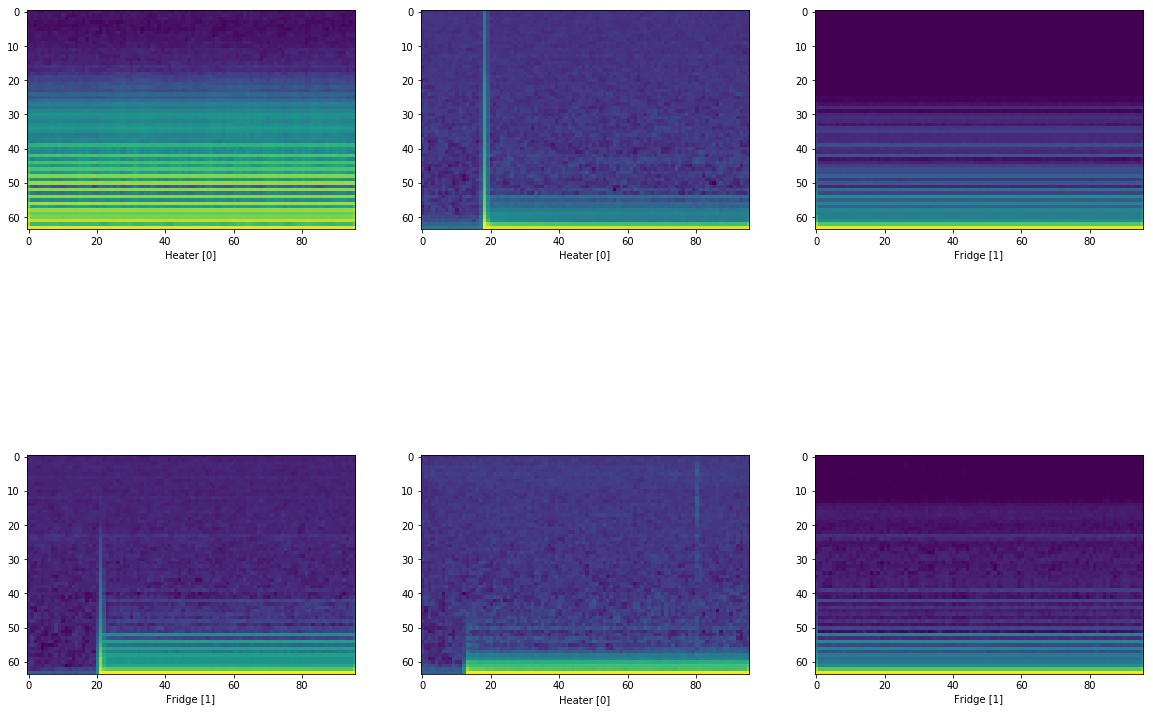

In [7]:
mltk.preview_image_dataset_to_model(ImagesDataFrame, image_column='Image', label_column='Label', classes=classes, n_samples=6)

In [8]:
ImagesDataFrame, input_shape = mltk.prepare_image_dataset_to_model(ImagesDataFrame, 
                                                             image_column='Image', 
                                                             processed_image_column='ImageToModel',
                                                             label_column='Label',
                                                             image_data_format='channels_last', 
                                                             size=size)

In [9]:
TrainDataset, ValidateDataset, TestDataset = mltk.train_validate_test_split(ImagesDataFrame, ratios=(0.7,0.3))

Validate = Test
Train Samples: 806 [70.0%]
Validate Samples: 346 [30.0%]
Test Samples: 346 [30.0%]


In [10]:
n_classes = 2
NClasses=n_classes
inputShape = input_shape
modelVariables = ['ImageToModel']
targetVariable = 'Label'
identifierColumns = ['id']
modelDataStats = None

In [14]:
sample_attributes = {'SampleDescription':'Image CLassification Example',
                    'NumClasses':NClasses,
                     'ClassLabelsMap':{'<>4':0, '==4':1},
                     'DataFormat':'image',
                    'RecordIdentifiers':identifierColumns,
                    'ModelDataStats':modelDataStats
                    }

model_attributes = {
                    'ModelID': None,
                    'ModelType':'classification',# 'regression'
                    'EnumerationType': 'binary', # 'multi' 'mono'
                    'ModelName': 'IncomeLevel',
                    'Version':'0.1',
                    'TrainingMethod': 'supervised'
                   }


score_parameters = {'Edges':[0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
                    'Percentiles':[0, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 0.95, 1.0],
                    'Threshold':0.5,
                   'Quantiles':10,
                    'TargetClass': '==4',
                   'ScoreVariable':'Probability',
                   'ScoreLabel':'Score',
                   'QuantileLabel':'Quantile',
                   'PredictedLabel':'Predicted'
                   }

In [15]:
architecture = {'layers': [
        {'name':'Conv2D1', 'type':'Conv2D', 'position':'input', 'config':{'filters':32, 'kernel_size':(3,3), 'strides':None, 'padding':'same', 'activation':'relu', 'input_shape':input_shape, 'data_format':'channels_last'}},
        {'name':'MaxPooling2D1', 'type':'MaxPooling2D', 'position':'hidden', 'config':{'pool_size':(2,2), 'strides':None, 'padding':'same', 'data_format':'channels_last'}},      
        {'name':'Conv2D2', 'type':'Conv2D', 'position':'hidden', 'config':{'filters': 64, 'kernel_size': (3,3), 'strides':None, 'padding':'same', 'activation':'relu', 'data_format':'channels_last'}},
        {'name':'MaxPooling2D2', 'type':'MaxPooling2D', 'position':'hidden', 'config':{'pool_size':(2,2), 'strides':None, 'padding':'same', 'data_format':'channels_last'}},       
        {'name':'Dropout1', 'type':'Dropout', 'position':'hidden', 'config':{'rate':0.5, 'noise_shape':None, 'seed':None}},
        {'name':'Flatten1', 'type':'Flatten', 'position':'hidden', 'config':{'data_format':'channels_last'}},
        {'name': 'Dense1', 'type':'Dense', 'position':'output',  'config':{'units': 256, 'activation':'relu', 'kernel_regularizer':None}}, 
        {'name':'Dropout2', 'type':'Dropout', 'position':'hidden', 'config':{'rate':0.5, 'noise_shape':None, 'seed':None}},
        {'name': 'Dense2', 'type':'Dense', 'position':'output',  'config':{'units':n_classes, 'activation':'softmax'}}
    ]}


Train samples: 806 loded...
Validate samples: 346 loded...
Test samples: 346 loded...
{'ModelID': 'INCOMELEVELCNN20200210003104', 'ModelType': 'classification', 'EnumerationType': 'binary', 'ModelName': 'IncomeLevel', 'Version': '0.1', 'TrainingMethod': 'supervised', 'MLTKVersion': '0.1.11', 'BuiltTime': '20200210003104', 'ModelFitTime': -1}
{'MLAlgorithm': 'CNN', 'BatchSize': 128, 'InputShape': (96, 64, 1), 'NumClasses': 2, 'Epochs': 5, 'EvalMatrics': ['accuracy'], 'Architecture': {'layers': [{'name': 'Conv2D1', 'type': 'Conv2D', 'position': 'input', 'config': {'filters': 32, 'kernel_size': (3, 3), 'strides': None, 'padding': 'same', 'activation': 'relu', 'input_shape': (96, 64, 1), 'data_format': 'channels_last'}}, {'name': 'MaxPooling2D1', 'type': 'MaxPooling2D', 'position': 'hidden', 'config': {'pool_size': (2, 2), 'strides': None, 'padding': 'same', 'data_format': 'channels_last'}}, {'name': 'Conv2D2', 'type': 'Conv2D', 'position': 'hidden', 'config': {'filters': 64, 'kernel_size'

Using TensorFlow backend.


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Conv2D1 (Conv2D)             (None, 96, 64, 32)        320       
_________________________________________________________________
MaxPooling2D1 (MaxPooling2D) (None, 48, 32, 32)        0         
_________________________________________________________________
Conv2D2 (Conv2D)             (None, 48, 32, 64)        18496     
_________________________________________________________________
MaxPooling2D2 (MaxPooling2D) (None, 24, 16, 64)        0         
_________________________________________________________________
Dropout1 (Dropout)           (None, 24, 16, 64)        0         
_________________________________________________________________
Flatten1 (Flatten)   

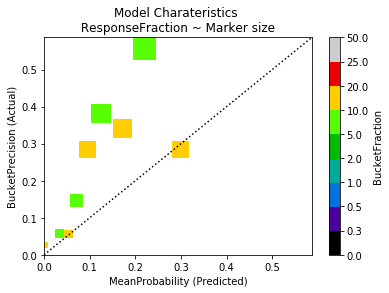

In [16]:
model_parameters = {'MLAlgorithm':'CNN',
                    'BatchSize':128,
                   'InputShape':inputShape,
                   'NumClasses':NClasses,
                   'Epochs':5,
                   'EvalMatrics':['accuracy'],
                   'Architecture':architecture,
                   'Verbose':True} 

NNModel = mltk.build_ml_model(TrainDataset, ValidateDataset, TestDataset, 
                                  model_variables=modelVariables,
                                  variable_setup = None,
                                  target_variable=targetVariable,
                                  model_attributes=model_attributes, 
                                  sample_attributes=sample_attributes, 
                                  model_parameters=model_parameters, 
                                  score_parameters=score_parameters, 
                                  return_model_object=True, 
                                  show_results=False, 
                                  show_plot=True
                                  )

In [17]:
NNModel.get_robustness_table()

,MinProbability,MaxProbability,MeanProbability,BucketCount,ResponseCount,BucketFraction,ResponseFraction,BucketPrecision,CumulativeBucketFraction,CumulativeResponseFraction,CumulativePrecision
Quantile,,,,,,,,,,,
1,0.0000,0.0102,0.0017,35,1,0.1012,0.0135,0.0286,1.0000,1.0000,0.2139
2,0.0103,0.0249,0.0182,35,0,0.1012,0.0000,0.0000,0.8988,0.9865,0.2347
3,0.0252,0.0423,0.0328,34,2,0.0983,0.0270,0.0588,0.7977,0.9865,0.2645
4,0.0438,0.0622,0.0522,35,2,0.1012,0.0270,0.0571,0.6994,0.9595,0.2934
5,0.0636,0.0811,0.0705,34,5,0.0983,0.0676,0.1471,0.5983,0.9324,0.3333
6,0.0813,0.1085,0.0944,35,10,0.1012,0.1351,0.2857,0.5000,0.8649,0.3699
7,0.1098,0.1460,0.1243,34,13,0.0983,0.1757,0.3824,0.3988,0.7297,0.3913
8,0.1465,0.1899,0.1698,35,12,0.1012,0.1622,0.3429,0.3006,0.5541,0.3942
9,0.1966,0.2520,0.2191,34,19,0.0983,0.2568,0.5588,0.1994,0.3919,0.4203


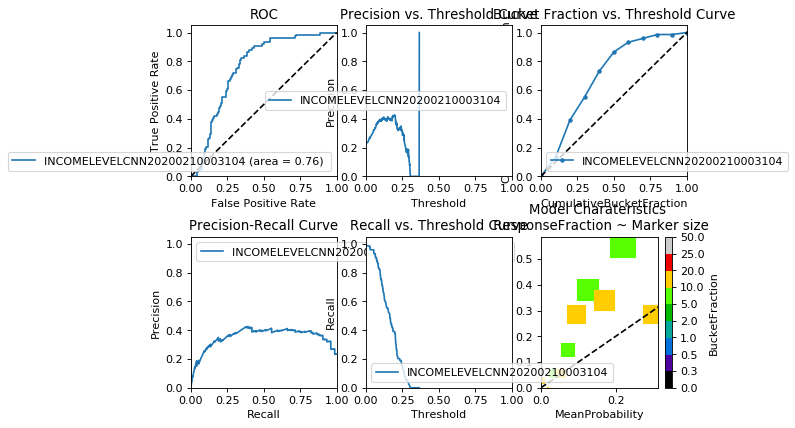

In [18]:
NNModel.plot_eval_matrics()

## Cite as
```
@misc{mltk2019,
  author =  "Sumudu Tennakoon",
  title = "MLToolKit(mltk): A Simplified Toolkit for Unifying End-To-End Machine Learing Projects",
  year = 2019,
  publisher = "GitHub",
  howpublished = {\url{https://mltoolkit.github.io/mltk/}},
  version = "0.1.11"
}
```

<hr>
This notebook and related materials were developed by Sumudu Tennakoon to demostrate the MLToolkit python library and its interoperability with the standared Python data analysis and machine learning packages (e.g. Pandas, Sci-kitlearn, Statsmodel, TensorFlow, Catboost, etc.)
Create Date: July 01, 2018; Last Update: February 12, 2020. 
Apache License, Version 2.0 (http://www.apache.org/licenses/LICENSE-2.0)